In [13]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [14]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [15]:
diabetes = pd.read_csv('diabetes.csv')

In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


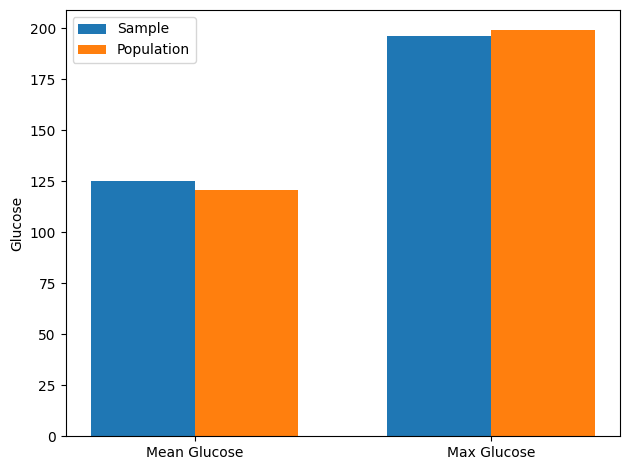

In [22]:
# Set random seed
np.random.seed(99)

# Generate a random sample of 25 observations
sample = diabetes.sample(n=25)

# Calculate mean and max of sample
mean_sample = np.mean(sample['Glucose'])
max_sample = np.max(sample['Glucose'])

# Calculate mean and max of population
mean_pop = diabetes['Glucose'].mean()
max_pop = diabetes['Glucose'].max()

# Create a bar chart to compare mean and max values
labels = ['Mean Glucose', 'Max Glucose']
sample_values = [mean_sample, max_sample]
pop_values = [mean_pop, max_pop]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, pop_values, width, label='Population')

ax.set_ylabel('Glucose')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

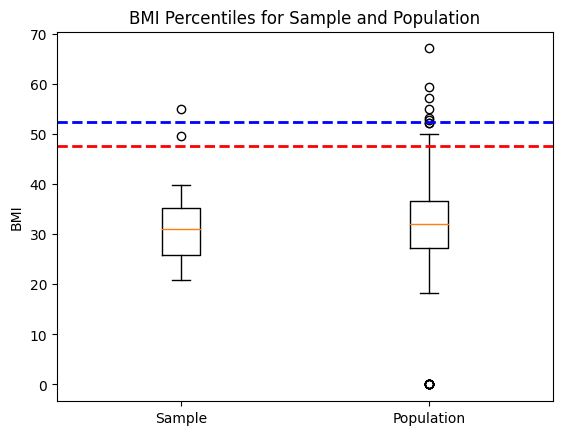

In [23]:
# Find the 98th percentile of BMI for the sample
sample_98th = np.percentile(sample['BMI'], 98)

# Find the 98th percentile of BMI for the population
pop_98th = np.percentile(diabetes['BMI'], 98)

# Create a box plot of BMI for the sample and population
plt.boxplot([sample['BMI'], diabetes['BMI']], labels=['Sample', 'Population'])
plt.title("BMI Percentiles for Sample and Population")
plt.ylabel("BMI")
plt.axhline(sample_98th, color='blue', linewidth=2, linestyle='--')
plt.axhline(pop_98th, color='red', linewidth=2, linestyle='--')
plt.show()


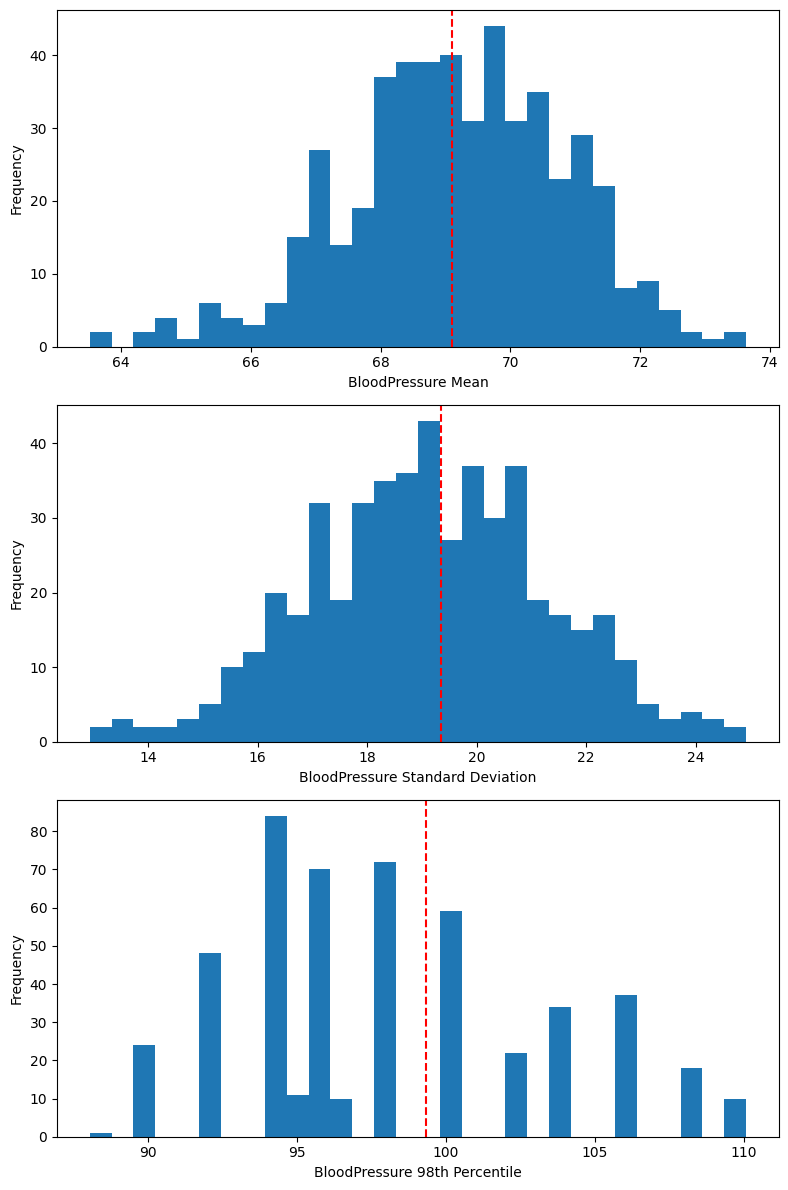

In [24]:
# Set random seed
np.random.seed(123)

# Define function to calculate mean, standard deviation, and percentile of BloodPressure
def calc_stats(data):
    return np.mean(data), np.std(data), np.percentile(data, 98)

# Generate 500 bootstrap samples of 150 observations each
n_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
for i in range(n_samples):
    sample = np.random.choice(diabetes['BloodPressure'], size=sample_size, replace=True)
    mean, std, percentile = calc_stats(sample)
    bootstrap_means.append(mean)
    bootstrap_stds.append(std)
    bootstrap_percentiles.append(percentile)

# Calculate population statistics for BloodPressure
pop_mean = np.mean(diabetes['BloodPressure'])
pop_std = np.std(diabetes['BloodPressure'])
pop_percentile = np.percentile(diabetes['BloodPressure'], 98)

# Create histograms to compare bootstrap means, standard deviations, and percentiles to population statistics
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].hist(bootstrap_means, bins=30)
axs[0].axvline(pop_mean, color='r', linestyle='--')
axs[0].set_xlabel('BloodPressure Mean')
axs[0].set_ylabel('Frequency')

axs[1].hist(bootstrap_stds, bins=30)
axs[1].axvline(pop_std, color='r', linestyle='--')
axs[1].set_xlabel('BloodPressure Standard Deviation')
axs[1].set_ylabel('Frequency')

axs[2].hist(bootstrap_percentiles, bins=30)
axs[2].axvline(pop_percentile, color='r', linestyle='--')
axs[2].set_xlabel('BloodPressure 98th Percentile')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
